#### IMPORTING THE LIBRARIES

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### IMPORTING THE DATASET

In [158]:
dataset = pd.read_csv('insurance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#### CHECKING IF THERE ARE ANY NULL VALUES IN DATASET

In [159]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### ENCODING THE STRING AND CHARACTER VALUES TO BITS OR NUMBERS SO THAT MODEL CAN USE THEM

In [160]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(), [1,4,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [161]:
print(X)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 1.0 ... 18 33.77 1]
 [0.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


#### SPLITTING THE DATASET

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

#### SCALING THE DATASET SO IT ENSURES ALL FEATURES ARE ON A COMPARABLE SCALE, IMPROVING MODEL ACCURACY AND TRAINING SPEED

In [163]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train_tree = X_train
X_test_tree = X_test
y_test_tree = y_test
y_train_tree = y_train
X_train[:, 2] = sc_x.fit_transform(X_train[:, 2].reshape(-1,1)).ravel()
X_test[:, 2] = sc_x.transform(X_test[:, 2].reshape(-1,1)).ravel()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

#### LINEAR REGRESSION MODEL

In [164]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train,y_train)
y_pred_reg1 = reg1.predict(X_test)
y_pred_reg1 = sc_y.inverse_transform(y_pred_reg1)

#### POLYNOMIAL REGRESSION MODEL

In [165]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
reg_poly = LinearRegression()
reg_poly.fit(X_poly, y_train)
y_pred_reg_poly = reg_poly.predict(poly_reg.transform(X_test))
y_pred_reg_poly = sc_y.inverse_transform(y_pred_reg_poly)

#### SUPPORT VECTOR REGRESSION (SVM) MODEL

In [166]:
from sklearn.svm import SVR
reg_svr = SVR(kernel='rbf')
reg_svr.fit(X_train,y_train)
y_pred_svr = sc_y.inverse_transform(reg_svr.predict(X_test).reshape(-1,1))

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### DECISION TREE REGRESSION MODEL

In [167]:
from sklearn.tree import DecisionTreeRegressor
reg_decision = DecisionTreeRegressor(random_state=0)
reg_decision.fit(X_train_tree, y_train_tree)
y_pred_decision = reg_decision.predict(X_test_tree)

#### RANDOM FOREST REGRESSION MODEL

In [168]:
from sklearn.ensemble import RandomForestRegressor
reg_random = RandomForestRegressor(n_estimators=10, random_state=0)
reg_random.fit(X_train_tree, y_train_tree)
y_pred_random = reg_random.predict(X_test_tree)

#### CHECKING WHICH MODEL PERFORMS THE BEST USING R2 SCORE

In [169]:
print("Checking which model gives max score: ")
from sklearn.metrics import r2_score
print(f"R2 score of linear regression model: {(r2_score(y_test, y_pred_reg1)):.2f}")
print(f"R2 score of polynomial regression model: {(r2_score(y_test, y_pred_reg_poly)):.2f}")
print(f"R2 score of SVM regression model: {(r2_score(y_test, y_pred_svr)):.2f}")
print(f"R2 score of Decision Tree regression model: {(r2_score(y_test, y_pred_decision)):.2f}")
print(f"R2 score of Random Forest regression model: {(r2_score(y_test, y_pred_random)):.2f}")

Checking which model gives max score: 
R2 score of linear regression model: 0.78
R2 score of polynomial regression model: 0.75
R2 score of SVM regression model: 0.52
R2 score of Decision Tree regression model: 0.68
R2 score of Random Forest regression model: 0.86


In [170]:
print(f"As we have seen, Random Forest regression model performaces the best with R2 score of {(r2_score(y_test, y_pred_random)):.2f}")

As we have seen, Random Forest regression model performaces the best with R2 score of 0.86


#### VISUALISING THE RANDOM FOREST REGRESSION MODEL RESULTS

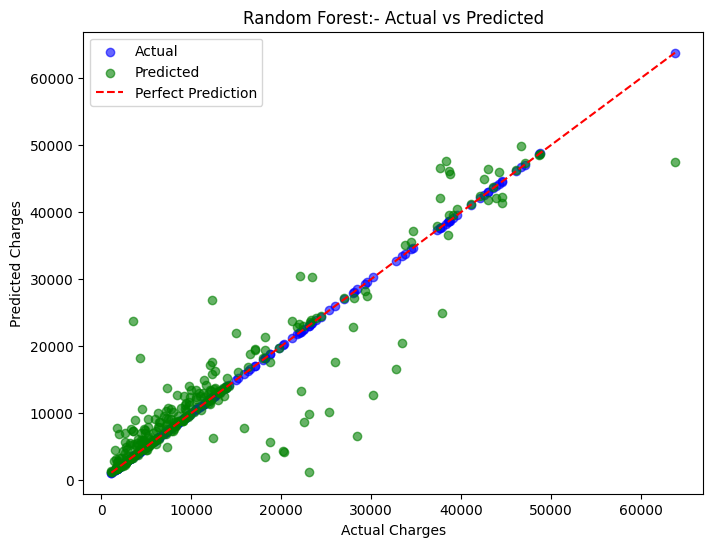

In [171]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test, color="blue", alpha=0.6, label="Actual")
plt.scatter(y_test, y_pred_random, color="green", alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Perfect Prediction")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Random Forest:- Actual vs Predicted")
plt.legend()
plt.show()
